In [11]:
import pandas as pd
import os

In [12]:
data_folder = 'Data'
filename = 'Clean_data.csv'
file_path = os.path.join(data_folder, filename)

# --------------------------------------------
# Step 2: Check if the File Exists
# --------------------------------------------

if not os.path.isfile(file_path):
    raise FileNotFoundError(f"The file '{file_path}' does not exist.")

# --------------------------------------------
# Step 3: Read the CSV File into a DataFrame
# --------------------------------------------

# Read the CSV without parsing dates
merged_df = pd.read_csv(file_path)

In [13]:
# Load your dataset
# Assuming `merged_df` is already prepared as described
# merged_df = pd.read_csv('path_to_your_dataset.csv')

# Define Variables
merged_df['Lag_y1'] = merged_df['Output_gap (%)'].shift(1)
merged_df['Lag_y2'] = merged_df['Output_gap (%)'].shift(2)
merged_df['Lag_pi1'] = merged_df['GDP Deflator'].shift(1)
merged_df['Lag_pi2'] = merged_df['GDP Deflator'].shift(2)
merged_df['Lag_i1'] = merged_df['Avg_Interest_Rate'].shift(1)
merged_df['Lag_i2'] = merged_df['Avg_Interest_Rate'].shift(2)

# Drop rows with NaN values created due to lagging
merged_df = merged_df.dropna()

print(merged_df)

   Quarter  Avg_Interest_Rate  GDP_Real (m£)  GDP_Pot (m£)  Output_gap (%)  \
2   1988Q1              8.630         133283        137215            2.95   
3   1988Q2              8.080         136630        141576            3.62   
4   1988Q3             10.755         140801        145602            3.41   
5   1988Q4             12.880         144969        149469            3.10   
6   1989Q1             12.880         148623        152205            2.41   
..     ...                ...            ...           ...             ...   
75  2006Q2              4.500         367042        366712           -0.09   
76  2006Q3              4.750         370883        370824           -0.02   
77  2006Q4              5.000         372900        372629           -0.07   
78  2007Q1              5.250         376958        378202            0.33   
79  2007Q2              5.500         386144        387920            0.46   

    GDP Deflator  Inflation_Rate (%)  Lag_y1  Lag_y2  Lag_pi1  

In [14]:
from sklearn.linear_model import LinearRegression

# Linear Model (SVAR) Implementation

X_y = merged_df[['Lag_y1', 'Lag_pi1', 'Lag_i1', 'Lag_i2']]
y_y = merged_df['Output_gap (%)']

X_pi = merged_df[['Output_gap (%)', 'Lag_y1', 'Lag_y2', 'Lag_pi1', 'Lag_pi2', 'Lag_i1']]
y_pi = merged_df['Inflation_Rate (%)']

ols_model_y = LinearRegression()
ols_model_pi = LinearRegression()

    # Fit Models
ols_model_y.fit(X_y, y_y)
ols_model_pi.fit(X_pi, y_pi)

LinearRegression()

# 1. Prepare the Data

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example: Using the same columns as in your original code.
# Make sure `merged_df` is already loaded/cleaned.
X_y = merged_df[['Lag_y1', 'Lag_pi1', 'Lag_i1', 'Lag_i2']]
y_y = merged_df['Output_gap (%)']

X_pi = merged_df[['Output_gap (%)', 'Lag_y1', 'Lag_y2', 'Lag_pi1', 'Lag_pi2', 'Lag_i1']]
y_pi = merged_df['Inflation_Rate (%)']

# For statsmodels, we need to explicitly add a constant term to the predictors:
X_y_const = sm.add_constant(X_y)     # Adds intercept to X for output-gap model
X_pi_const = sm.add_constant(X_pi)   # Adds intercept to X for inflation model

# 2. Fit Linear Models using statsmodels

In [16]:
# Output Gap Model
ols_model_y = sm.OLS(y_y, X_y_const).fit()
print("=== Output Gap Model Summary ===")
print(ols_model_y.summary())

# Inflation Model
ols_model_pi = sm.OLS(y_pi, X_pi_const).fit()
print("\n=== Inflation Model Summary ===")
print(ols_model_pi.summary())

=== Output Gap Model Summary ===
                            OLS Regression Results                            
Dep. Variable:         Output_gap (%)   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     353.8
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           5.78e-47
Time:                        17:37:05   Log-Likelihood:                -17.181
No. Observations:                  78   AIC:                             44.36
Df Residuals:                      73   BIC:                             56.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.81

# 3. Visualization: Actual vs. Predicted

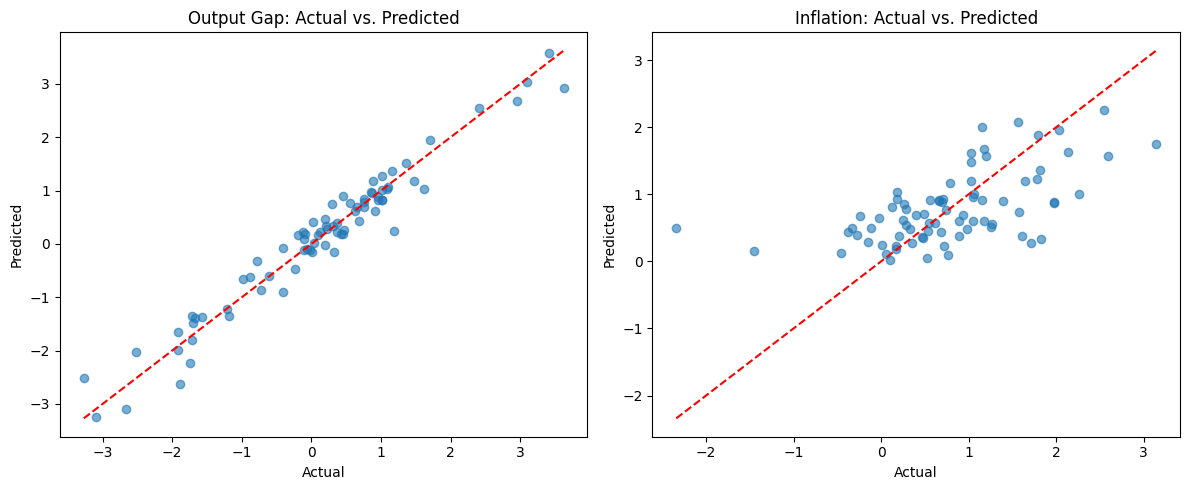


=== Output Gap Model Coefficients ===
         Coefficient       p-value  95% CI Lower  95% CI Upper
const       1.814303  1.955316e-03      0.688938      2.939668
Lag_y1      0.920237  1.264347e-42      0.858745      0.981730
Lag_pi1    -0.021720  1.027509e-02     -0.038149     -0.005290
Lag_i1     -0.122697  5.696388e-02     -0.249123      0.003729
Lag_i2      0.027806  6.724730e-01     -0.102752      0.158365

=== Inflation Model Coefficients ===
                Coefficient   p-value  95% CI Lower  95% CI Upper
const              1.898017  0.196088     -1.001892      4.797926
Output_gap (%)    -0.684931  0.022610     -1.270879     -0.098983
Lag_y1             0.542690  0.240988     -0.372468      1.457848
Lag_y2             0.164275  0.576719     -0.419840      0.748390
Lag_pi1           -0.458945  0.048751     -0.915306     -0.002583
Lag_pi2            0.431920  0.061059     -0.020576      0.884417
Lag_i1             0.067137  0.236206     -0.044920      0.179194


In [17]:
# Predictions for the Output Gap Model
y_y_pred = ols_model_y.predict(X_y_const)

# Predictions for the Inflation Model
y_pi_pred = ols_model_pi.predict(X_pi_const)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot 1: Actual vs. Predicted (Output Gap)
ax[0].scatter(y_y, y_y_pred, alpha=0.6)
# Plot a 45-degree reference line
min_val = min(y_y.min(), y_y_pred.min())
max_val = max(y_y.max(), y_y_pred.max())
ax[0].plot([min_val, max_val], [min_val, max_val], 'r--')
ax[0].set_title('Output Gap: Actual vs. Predicted')
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

# --- Plot 2: Actual vs. Predicted (Inflation)
ax[1].scatter(y_pi, y_pi_pred, alpha=0.6)
min_val = min(y_pi.min(), y_pi_pred.min())
max_val = max(y_pi.max(), y_pi_pred.max())
ax[1].plot([min_val, max_val], [min_val, max_val], 'r--')
ax[1].set_title('Inflation: Actual vs. Predicted')
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# --------------------------------------------------
# 4. Table of Coefficients
# --------------------------------------------------

print("\n=== Output Gap Model Coefficients ===")
coef_y = pd.DataFrame({
    'Coefficient': ols_model_y.params,
    'p-value': ols_model_y.pvalues,
    '95% CI Lower': ols_model_y.conf_int()[0],
    '95% CI Upper': ols_model_y.conf_int()[1]
})
print(coef_y)

print("\n=== Inflation Model Coefficients ===")
coef_pi = pd.DataFrame({
    'Coefficient': ols_model_pi.params,
    'p-value': ols_model_pi.pvalues,
    '95% CI Lower': ols_model_pi.conf_int()[0],
    '95% CI Upper': ols_model_pi.conf_int()[1]
})
print(coef_pi)